In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

print(keras.__version__)
print(tensorflow.__version__)

3.4.1
2.15.0


In [5]:
train_data_path = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train'
val_data_path = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation'




In [14]:
#showing the augmemted images

def plotImages(images_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

## This is the augmentation configuration we will use for training
## It will generate more images by using the following code

In [8]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

#THis is the generator that will read the images present in the data
training_data = training_datagen.flow_from_directory(train_data_path,
                                                        target_size=(200,200),
                                                        batch_size=128,
                                                        class_mode='binary')#Since we will be using binary crossentropy loss function, we need binary labels

Found 600 images belonging to 2 classes.


In [9]:
training_data.class_indices

{'Mask': 0, 'Non Mask': 1}

In [12]:
#THis is the configuration we will use for validation
#Now scaling

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(val_data_path,
                                              target_size=(200,200),
                                              batch_size=128,
                                               class_mode='binary')

Found 306 images belonging to 2 classes.


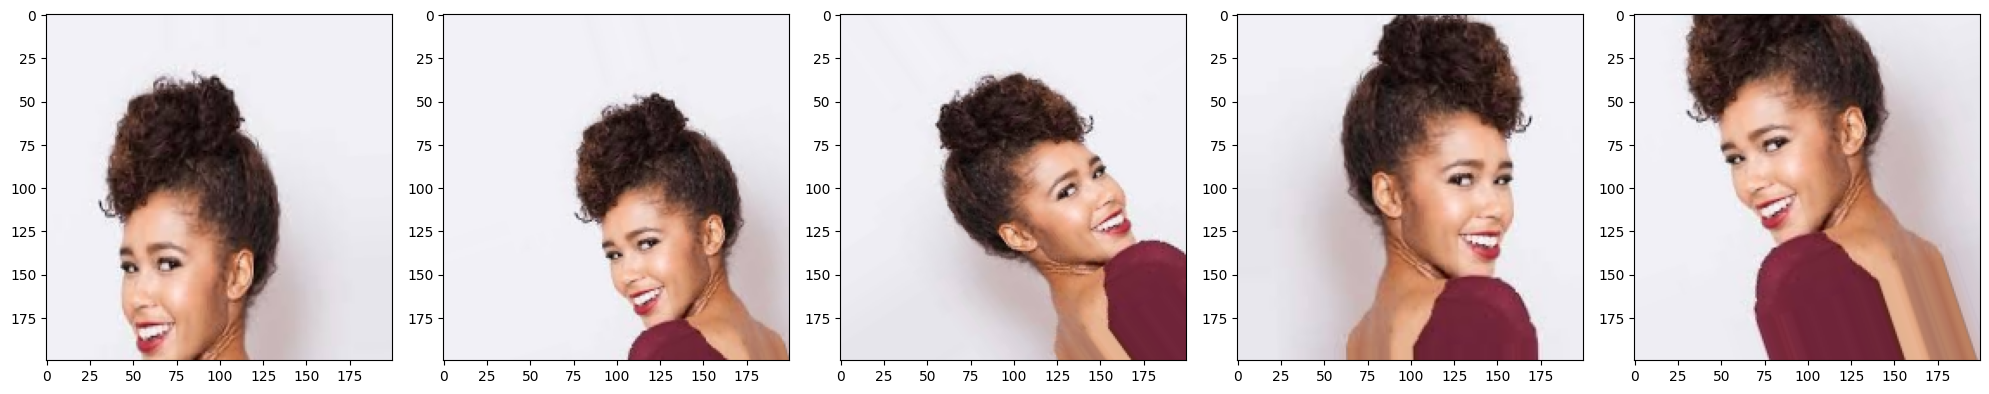

In [17]:
#showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [23]:
#NOW we will create the CNN model and train it
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=5,input_shape=[200,200,3]),
    keras.layers.MaxPooling2D(pool_size=(4,4)),
    keras.layers.Conv2D(filters=64,kernel_size=4),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=128,kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256,kernel_size=2),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(), #nueral network building
    keras.layers.Dense(units=128,activation='relu'), #Input layer
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=2,activation='softmax')]) #output layer
    
    
#NOW compile the CNN model
cnn_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#training
history = cnn_model.fit(training_data,
                       epochs=10,
                       verbose=1,
                       validation_data = valid_data,
                       )

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5374 - loss: 0.6927 - val_accuracy: 0.5915 - val_loss: 0.6225
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.6666 - loss: 0.6061 - val_accuracy: 0.7843 - val_loss: 0.4553
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7539 - loss: 0.5228 - val_accuracy: 0.7843 - val_loss: 0.5126
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7537 - loss: 0.5420 - val_accuracy: 0.8856 - val_loss: 0.3489
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8111 - loss: 0.4505 - val_accuracy: 0.8627 - val_loss: 0.3465
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8022 - loss: 0.4688 - val_accuracy: 0.8301 - val_loss: 0.3629
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7990 - loss: 0.4424 - val_accuracy: 0.8725 - val_loss: 0.3196
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8554 - loss: 0.3748 - val_accuracy: 0.8824 - val_loss: 0.3233
Epoch 9/10
5/5 ━━━━

## The model is giving a Validation Accuracy of 89%

## Now you can save the model by using this command
cnn_model.save('Your directory')

## Now we will create an Face App which will detect a person's face and predict whether the person is wearing a mask or not

In [ ]:
import cv2
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

#now your saved model that we created earlier(CNN model)
model = load_model('Saved model directory')

#Model will accept the follwing height and width of the images
img_width, img_height = 200,200


In [ ]:
#Load the cascade face classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#start the web cam
cap = cv2.VideoCapture('video directory') # for live face videos

img_count_full = 0

#parameters for the text
font = cv2.Font_HERSHEY_SIMPLEX

#ORG
org = (1,1)
class_label = ''

#font scale
fontscale = 1

#Blue color in BGR
color = (255,0,0)

#line thickness of 2px
thickness = 2

#start reading images and predictions
while True:
    img_count_full +=1
    
    #Read the image from webcam
    #response, color_img = cap.read()
    color_img = cv2.imread('your picture directory')
    
    #if response is False then break the loop
    if response == False:
        break
        
        
    #Resize the image with 50% ratio
    scale = 50
    width = int(color_img.shape[1] * scale/100)
    height = int(color_img.shape[0] * scale/100)
    dim = (width,height)
    #resize the image
    color_img = cv2.resize(color_img, dim, interpolation-cv2.INTER_AREA)
    
    #Convert to grayscale
    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    
    #Detect the faces 
    faces = face_cascade.detectMultiScale(gray_img, 1.1,6) 
    
    #Detect the face and then predict whether the face is masked or not
    img_count = 0
    for (x,y,w,h) in face:
        org = (x-10,y-10)
        img_count +=1
        color_face = color_img[y:y+h,x:x+w] #color face
        cv2.imwrite('faces/input/%d%dface.jpg'%(img_count_full,img_count),color_face)
        img = load_img('faces/input/%d%dface.jpg'%(img_count_full,img_count),target_size=img_width,img_height)
        
        img= img_to_array(img)/255
        img = np.expand_dims(img,axis=0)
        pred_prob = model.predict(img)
        pred = np.argmax(pred_prob)
        
        if pred == 0:
            print('User with mask - predic = ',pred_prob[0][0])
            class_label = 'Mask'
            color = (255,0,0)
            cv2.imwrite('faces/with_masl/%d%dface.jpg'%(img_count_full,img_count),color_face)
            
        else:
            print('user not wearing mask - prob = ',pred_prob[0][1])
            class_label = 'No mask'
            color = (0,255,0)
            cv2.imwrite('faces/without_mask/%d%dface.jpg'%(img_count_full,img_count),color_face)
            
        cv2.rectangle(color_img,(x,y), (x+w,y+h), (0,0,255),3)
        #using cv2.put text() method
        cv2.putText(color_img,class_label,org,font,fontScale,color,thickness,cv2.LINE_AA)
        
    #Display the image
    cv2.imshow('LIVE FACE MASK DETECTION', color_img)
    if cv2.waitKey(1) & 0xFF = ord('q'):
        break
        
#release the video capture object
cap.release()
cv2.destroyAllWindows()
            
            

## Now when the above code is executed, it will open a video capture that will be liked with your webcam. It will take an image of your face and will predict whether you're wearing a face mask or not